# Acquisition Data

# Requirement untuk Membangun Model U-Net/ DeepLabV3+

## 1. Requirement
- **Bahasa Pemrograman**: Python
- **Library yang Diperlukan**:
  - TensorFlow
  - Keras
  - NumPy
  - PIL (Pillow)
  - OpenCV (jika diperlukan untuk pemrosesan gambar)
  - Matplotlib (untuk visualisasi, jika diperlukan)
- **Hardware**:
  - GPU (disarankan untuk pelatihan model)
  - RAM yang cukup untuk memproses dataset

## 2. Standarisasi Dataset
- **Format Gambar**: 
  - Gambar harus dalam format yang didukung seperti PNG, JPEG, BMP, atau TIFF.
- **Ukuran Gambar**:
  - Semua gambar harus diubah ukurannya menjadi 256x256 piksel (atau ukuran lain yang sesuai dengan model).
- **Mode Warna**:
  - Gambar harus dalam mode RGB.
- **Label Gambar**:
  - Ground truth (mask) harus memiliki format yang sama dengan gambar asli dan harus memiliki warna yang konsisten untuk setiap kelas.

## 3. Kriteria Dataset
- **Kualitas Gambar**:
  - Gambar harus jelas dan tidak buram.
  - Tidak ada gambar yang terdistorsi atau terpotong.
- **Keseimbangan Kelas**:
  - Dataset harus memiliki jumlah gambar yang seimbang untuk setiap kelas untuk menghindari bias dalam pelatihan.
- **Variasi Gambar**:
  - Dataset harus mencakup variasi dalam pencahayaan, sudut pandang, dan latar belakang untuk meningkatkan generalisasi model.
- **Ground Truth**:
  - Setiap gambar harus memiliki file ground truth yang sesuai, yang menunjukkan kelas yang benar untuk setiap piksel.
- **Pengorganisasian Folder**:
  - Struktur folder harus jelas, dengan folder terpisah untuk gambar asli dan ground truth.
  - Contoh struktur folder:
    ```
    /DATASET
        /original
            ORI_001.jpg
            ORI_002.jpg
            ...
        /ground_truth
            GT_001.jpg
            GT_002.jpg
            ...
    ```

In [4]:
# Import the required libraries
import os
import numpy as np
from PIL import Image

# Set the base_dataset path to a relative path
base_dataset = os.path.join(os.getcwd(), "DATASET")

# Check if the path exists
if os.path.exists(base_dataset):
    print("Path exists.")
    fnames = os.listdir(base_dataset)
    print("Files in directory:", fnames)
else:
    print("Path does not exist. Please check the path:", base_dataset)

Path exists.
Files in directory: ['augmentation', 'data_split', 'ground_truth', 'original', 'preprocessed']


In [6]:
# Path to folder 'original' and 'ground_truth'
base_dataset = './DATASET' 
data_ori = os.path.join(base_dataset, 'original')
data_gt = os.path.join(base_dataset, 'ground_truth')

# Check if the folder exists
if not os.path.exists(data_ori):
    print(f"Folder tidak ditemukan: {data_ori}")
if not os.path.exists(data_gt):
    print(f"Folder tidak ditemukan: {data_gt}")

def get_file_formats(folder_path):
    """
    Fungsi untuk mendapatkan format file yang ada di dalam folder.
    """
    formats = set()
    for filename in os.listdir(folder_path):
        formats.add(filename.split('.')[-1].lower())
    return list(formats)

# Count the number of files in the original and ground_truth folders
if os.path.exists(data_ori):
    print(f"\nJumlah data di folder original: {len(os.listdir(data_ori))}")
if os.path.exists(data_gt):
    print(f"\nJumlah data di folder ground_truth: {len(os.listdir(data_gt))}")

# Get file formats in original and ground_truth folders
if os.path.exists(data_ori):
    print(f"\nFormat file di folder original: {get_file_formats(data_ori)}")
if os.path.exists(data_gt):
    print(f"\nFormat file di folder ground_truth: {get_file_formats(data_gt)}")


Jumlah data di folder original: 216

Jumlah data di folder ground_truth: 216

Format file di folder original: ['png', 'jpg', 'jpeg']

Format file di folder ground_truth: ['jpg']


In [9]:
import os
from PIL import Image
import numpy as np

# Path to folder 'original' and 'ground_truth'
base_dataset = './DATASET' 
data_ori = os.path.join(base_dataset, 'original')
data_gt = os.path.join(base_dataset, 'ground_truth')

# Function to get detailed information from an image
def get_image_info(image_path):
    with Image.open(image_path) as img:
        img_format = img.format  # Image format (e.g., JPEG, PNG)
        img_size = img.size      # Image size (width, height)
        img_mode = img.mode      # Image mode (e.g., RGB, L, RGBA)

        # Convert image to numpy array to get shape
        img_array = np.array(img)
        img_shape = img_array.shape    # Shape of the image (e.g., (720, 720, 3))

        img_info = {
            "Format": img_format,
            "Size (Width x Height)": img_size,
            "Color Mode": img_mode,
            "Total Pixels": img_size[0] * img_size[1],
            "Shape": img_shape
        }
        return img_info

# Get all image files in the original folder
image_files = [f for f in os.listdir(data_ori) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Display detailed information for each image
for image_file in image_files:
    image_path = os.path.join(data_ori, image_file)
    info = get_image_info(image_path)
    print(f"\nImage Information: {image_file}")
    for key, value in info.items():
        print(f"{key}: {value}")

# Get all image files in the ground_truth folder
label_files = [f for f in os.listdir(data_gt) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Display detailed information for each image in the ground_truth folder
for label_file in label_files:
    label_path = os.path.join(data_gt, label_file)
    info = get_image_info(label_path)
    print(f"\nGround Truth Image Information: {label_file}")
    for key, value in info.items():
        print(f"{key}: {value}")


Image Information: ID_001.jpg
Format: JPEG
Size (Width x Height): (600, 600)
Color Mode: RGB
Total Pixels: 360000
Shape: (600, 600, 3)

Image Information: ID_002.jpg
Format: JPEG
Size (Width x Height): (600, 600)
Color Mode: RGB
Total Pixels: 360000
Shape: (600, 600, 3)

Image Information: ID_003.jpg
Format: JPEG
Size (Width x Height): (600, 600)
Color Mode: RGB
Total Pixels: 360000
Shape: (600, 600, 3)

Image Information: ID_004.jpg
Format: JPEG
Size (Width x Height): (600, 600)
Color Mode: RGB
Total Pixels: 360000
Shape: (600, 600, 3)

Image Information: ID_006.jpg
Format: JPEG
Size (Width x Height): (600, 600)
Color Mode: RGB
Total Pixels: 360000
Shape: (600, 600, 3)

Image Information: ID_007.jpg
Format: JPEG
Size (Width x Height): (600, 600)
Color Mode: RGB
Total Pixels: 360000
Shape: (600, 600, 3)

Image Information: ID_008.jpg
Format: JPEG
Size (Width x Height): (600, 600)
Color Mode: RGB
Total Pixels: 360000
Shape: (600, 600, 3)

Image Information: ID_009.jpg
Format: JPEG
Size

# Preprocessing Data

In [19]:
import os
import numpy as np
from PIL import Image
import cv2

# Path to folder 'original' and 'ground_truth'
base_dataset = './DATASET' 
data_ori = os.path.join(base_dataset, 'original')
data_gt = os.path.join(base_dataset, 'ground_truth')

# Defining target sizes
low = (128, 128)
standard = (256, 256)
high = (512, 512)

# Set the size and target for resizing
target = standard  # Set the target size for resizing

# Function to normalize images
def normalize_image(image):
    """Normalize the image to range [0, 1]."""
    image_array = np.array(image).astype(np.float32) / 255.0  # Normalize to [0, 1]
    return Image.fromarray((image_array * 255).astype(np.uint8))  # Convert back to Image

def preprocess_images(src_folder, is_mask=False):
    processed_images = []
    file_list = sorted(os.listdir(src_folder))  # Ensure file order is consistent

    for filename in file_list:
        img_path = os.path.join(src_folder, filename)
        file_name, file_extension = os.path.splitext(filename)

        try:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                with Image.open(img_path) as img:
                    if not is_mask:
                        # Preprocess original images
                        img = img.convert("RGB")  # Ensure RGB mode
                        img = img.resize(target, Image.Resampling.LANCZOS)
                        img = normalize_image(img)
                    else:
                        # Preprocess ground truth images (masks)
                        img = img.convert("RGB")  # Ensure RGB mode for masks
                        img = img.resize(target, Image.Resampling.NEAREST)  # Nearest interpolation to preserve class values
                        img = enhance_contrast_for_mask(img)  # Enhance contrast without creating gradients
                        img = threshold_colors(img)  # Threshold colors to remove noise

                    # Save the processed image as PNG
                    new_file_path = os.path.join(src_folder, f"{file_name}.png")
                    img.save(new_file_path, 'PNG')
                    print(f"File {filename} converted to {file_name}.png.")

            else:
                print(f"File {filename} is not a supported format and will be ignored.")

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

    return processed_images

# Function to enhance contrast for ground truth images without changing class values
def enhance_contrast_for_mask(image):
    """Enhance contrast for ground truth image while preserving class values."""
    image_array = np.array(image)
    unique_colors = np.unique(image_array.reshape(-1, image_array.shape[2]), axis=0)

    if len(unique_colors) <= 3:
        # Convert to grayscale and apply histogram equalization
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
        enhanced_gray = cv2.equalizeHist(gray_image)

        # Create an enhanced image based on the original colors
        enhanced_mask = np.zeros_like(image_array)
        for color in unique_colors:
            mask = np.all(image_array == color, axis=-1)
            enhanced_mask[mask] = color  # Keep the original colors
    else:
        enhanced_mask = image_array  # Skip enhancement

    return Image.fromarray(enhanced_mask)

# Function to threshold colors in the mask
def threshold_colors(image):
    """Threshold the colors in the ground truth mask."""
    image_array = np.array(image)
    thresholded_image = np.where(image_array > 180, 255, 0).astype(np.uint8)  # Thresholding
    return Image.fromarray(thresholded_image)

# Preprocess original images and convert to PNG if necessary
preprocess_images(data_ori, is_mask=False)

# Preprocess ground truth images and convert to PNG if necessary
preprocess_images(data_gt, is_mask=True)

print("Preprocessing completed")

File ORI_000.png converted to ORI_000.png.
File ORI_001.png converted to ORI_001.png.
File ORI_002.png converted to ORI_002.png.
File ORI_003.png converted to ORI_003.png.
File ORI_004.png converted to ORI_004.png.
File ORI_005.png converted to ORI_005.png.
File ORI_006.png converted to ORI_006.png.
File ORI_007.png converted to ORI_007.png.
File ORI_008.png converted to ORI_008.png.
File ORI_009.png converted to ORI_009.png.
File ORI_010.png converted to ORI_010.png.
File ORI_011.png converted to ORI_011.png.
File ORI_012.png converted to ORI_012.png.
File ORI_013.png converted to ORI_013.png.
File ORI_014.png converted to ORI_014.png.
File ORI_015.png converted to ORI_015.png.
File ORI_016.png converted to ORI_016.png.
File ORI_017.png converted to ORI_017.png.
File ORI_018.png converted to ORI_018.png.
File ORI_019.png converted to ORI_019.png.
File ORI_020.png converted to ORI_020.png.
File ORI_021.png converted to ORI_021.png.
File ORI_022.png converted to ORI_022.png.
File ORI_02

In [27]:
import os
from PIL import Image
from collections import Counter

# Path to folder 'original' and 'ground_truth'
base_dataset = './DATASET' 
data_ori = os.path.join(base_dataset, 'original')
data_gt = os.path.join(base_dataset, 'ground_truth')

# Function to analyze images in a folder
def analyze_images(folder_path):
    total_images = 0
    total_width, total_height = 0, 0
    total_pixels = 0
    color_modes = []
    file_formats = set()
    
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        try:
            with Image.open(file_path) as img:
                total_images += 1
                width, height = img.size
                total_width += width
                total_height += height
                total_pixels += width * height
                color_modes.append(img.mode)
                file_formats.add(img.format)
        except Exception as e:
            print(f"Failed to process {filename}: {e}")
    
    # Calculate average size and total pixels
    avg_width = total_width / total_images if total_images > 0 else 0
    avg_height = total_height / total_images if total_images > 0 else 0
    avg_total_pixels = total_pixels / total_images if total_images > 0 else 0
    
    # Find the most common color mode
    most_common_color_mode = Counter(color_modes).most_common(1)[0][0] if color_modes else "Unknown"
    
    return {
        "Total Images": total_images,
        "Average Image Size": (avg_width, avg_height),
        "Average Total Pixels": avg_total_pixels,
        "Most Common Color Mode": most_common_color_mode,
        "File Format": list(file_formats)
    }

# Analyze both folders
results = {
    "Original": analyze_images(data_ori),
    "Ground Truth": analyze_images(data_gt)
}

# Display results
for folder_name, info in results.items():
    print(f"Analysis Results for Folder {folder_name}:")
    print(f"Total Images: {info['Total Images']}")
    print(f"Average Image Size: ({info['Average Image Size'][0]:.2f} x {info['Average Image Size'][1]:.2f})")
    print(f"Average Total Pixels: {info['Average Total Pixels']:.2f}")
    print(f"Most Common Color Mode: {info['Most Common Color Mode']}")
    print(f"File Format: {info['File Format']}\n")

# Ensure that the number of images in the Original and Ground Truth folders is the same
assert results["Original"]["Total Images"] == results["Ground Truth"]["Total Images"], "The number of images in the original and ground truth folders do not match."

# Ensure that the average image size in both folders is the same
assert results["Original"]["Average Image Size"] == results["Ground Truth"]["Average Image Size"], "The average image size in the original and ground truth folders do not match."

# Ensure that the average total pixels in both folders are the same
assert results["Original"]["Average Total Pixels"] == results["Ground Truth"]["Average Total Pixels"], "The average total pixels in the original and ground truth folders do not match."

# Ensure that the most common color mode in both folders is the same
assert results["Original"]["Most Common Color Mode"] == results["Ground Truth"]["Most Common Color Mode"], "The most common color mode in the original and ground truth folders do not match."

# Ensure that the file formats in both folders are the same
assert results["Original"]["File Format"] == results["Ground Truth"]["File Format"], "The file format in the original and ground truth folders do not match."

print("\nAll tests passed! The original and ground truth folders have matching image data.")

Analysis Results for Folder Original:
Total Images: 216
Average Image Size: (256.00 x 256.00)
Average Total Pixels: 65536.00
Most Common Color Mode: RGB
File Format: ['PNG']

Analysis Results for Folder Ground Truth:
Total Images: 216
Average Image Size: (256.00 x 256.00)
Average Total Pixels: 65536.00
Most Common Color Mode: RGB
File Format: ['PNG']


All tests passed! The original and ground truth folders have matching image data.


# SPLIT DATA

In [24]:
import os  # Ensure os is imported
import shutil  # Import shutil for file operations
from sklearn.model_selection import train_test_split

# Path to folder 'original' and 'ground_truth'
base_dataset = './DATASET' 
source_ori = os.path.join(base_dataset, 'original')
source_gt = os.path.join(base_dataset, 'ground_truth')

# Destination folders for train, validation, and test under base
train_dir = os.path.join(base_dataset, 'train')
val_dir = os.path.join(base_dataset, 'val')
test_dir = os.path.join(base_dataset, 'test')

# Create folders for train, validation, and test
os.makedirs(os.path.join(train_dir, 'original'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'ground_truth'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'original'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'ground_truth'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'original'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'ground_truth'), exist_ok=True)

# Get all image and mask files
original_files = sorted(os.listdir(source_ori))
ground_truth_files = sorted(os.listdir(source_gt))

# Checking if the number of image and mask files are the same
if len(original_files) != len(ground_truth_files):
    print(f"WARNING: The number of original images ({len(original_files)}) does not match the number of masks ({len(ground_truth_files)})")
else:
    print(f"Number of images and masks match: {len(original_files)} files")

# Dataset sharing ratio
train_ratio = 0.8  # 80% train
val_ratio = 0.1    # 10% validation
test_ratio = 0.1   # 10% test

if (train_ratio + val_ratio + test_ratio) != 1.0:
    raise ValueError("The sum of train, validation, and test ratios must equal 1.0")

# Split the dataset into train, val, test
train_original, temp_original, train_ground_truth, temp_ground_truth = train_test_split(
    original_files, ground_truth_files, test_size=(1.0 - train_ratio), random_state=42)

val_size = val_ratio / (val_ratio + test_ratio)  # Calculate validation ratio against (validation + test)

val_original, test_original, val_ground_truth, test_ground_truth = train_test_split(
    temp_original, temp_ground_truth, test_size=(1.0 - val_size), random_state=42)

# Function to copy files to the right directory
def copy_files(original_list, ground_truth_list, folder):
    if not original_list or not ground_truth_list:
        print(f"ERROR: No files to process in {folder}")
        return

    for orig, gt in zip(original_list, ground_truth_list):
        shutil.copy(os.path.join(source_ori, orig), os.path.join(folder, 'original', orig))
        shutil.copy(os.path.join(source_gt, gt), os.path.join(folder, 'ground_truth', gt))

    print(f"{len(original_list)} files successfully copied to {folder}")

# Copy files to their respective folders
copy_files(train_original, train_ground_truth, train_dir)
copy_files(val_original, val_ground_truth, val_dir)
copy_files(test_original, test_ground_truth, test_dir)

print("Data preparation process completed.")

Number of images and masks match: 216 files
172 files successfully copied to ./DATASET\train
22 files successfully copied to ./DATASET\val
22 files successfully copied to ./DATASET\test
Data preparation process completed.


In [32]:
import os  # Ensure os is imported for file operations

# Path to folder 'original' and 'ground_truth'
base_dataset = './DATASET' 
train_dir = os.path.join(base_dataset, 'train')
val_dir = os.path.join(base_dataset, 'val')

# Function to count images in a folder
def count_images(folder):
    return len([f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Count images in train and validation folders
train_original_count = count_images(os.path.join(train_dir, 'original'))
train_ground_truth_count = count_images(os.path.join(train_dir, 'ground_truth'))
val_original_count = count_images(os.path.join(val_dir, 'original'))
val_ground_truth_count = count_images(os.path.join(val_dir, 'ground_truth'))

# Display results
print(f"Number of datasets in the train folder:")
print(f"Original: {train_original_count}")
print(f"Ground Truth: {train_ground_truth_count}")

print(f"\nNumber of datasets in the validation folder:")
print(f"Original: {val_original_count}")
print(f"Ground Truth: {val_ground_truth_count}")

# Validate consistency between original and ground truth in train and val
assert train_original_count == train_ground_truth_count, "The number of images in the train original and ground truth folders do not match."
assert val_original_count == val_ground_truth_count, "The number of images in the validation original and ground truth folders do not match."

print("\nAll tests passed! The number of datasets in the train and validation folders is consistent between original and ground truth.")

Number of datasets in the train folder:
Original: 172
Ground Truth: 172

Number of datasets in the validation folder:
Original: 22
Ground Truth: 22

All tests passed! The number of datasets in the train and validation folders is consistent between original and ground truth.


# K-Fold Validation (Optional)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import shutil
import os

# Number of folds
n_splits = 5

# Create K-Fold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Function to copy files to the appropriate directory (as in the previous code)
def copy_files_kfold(original_list, ground_truth_list, folder, idx):
    if not original_list or not ground_truth_list:
        print(f"ERROR: No files to process in {folder}")
        return

    for orig, gt in zip(original_list, ground_truth_list):
        shutil.copy(os.path.join(img_128, orig), os.path.join(folder, 'original', orig))
        shutil.copy(os.path.join(label_128, gt), os.path.join(folder, 'ground_truth', gt))

    print(f"{len(original_list)} files from fold-{idx+1} successfully copied to \n{folder}\n")

# Get all image and mask files
original_files = sorted(os.listdir(img_128))
ground_truth_files = sorted(os.listdir(label_128))

# Check if the number of image and mask files are the same
if len(original_files) != len(ground_truth_files):
    print(f"WARNING: The number of original images ({len(original_files)}) does not match the number of masks ({len(ground_truth_files)})")
else:
    print(f"The number of images and masks match: {len(original_files)} files")

# Create output folders for each fold
base_split = os.path.join(path, "data_split_kfold")
os.makedirs(base_split, exist_ok=True)

# KFold splitting
fold_idx = 0
for train_val_idx, test_idx in kf.split(original_files):

    # Split into train+validation and test set
    train_val_original = [original_files[i] for i in train_val_idx]
    train_val_ground_truth = [ground_truth_files[i] for i in train_val_idx]
    test_original = [original_files[i] for i in test_idx]
    test_ground_truth = [ground_truth_files[i] for i in test_idx]

    # Calculate size for train and validation
    val_size = 0.05 / 0.95  # validation size relative to the train+validation set

    # Split train and validation from train_val set
    train_original, val_original, train_ground_truth, val_ground_truth = train_test_split(
        train_val_original, train_val_ground_truth, test_size=val_size, random_state=42)

    # Create folder for each fold
    fold_dir = os.path.join(base_split, f"fold_{fold_idx+1}")
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')
    test_dir = os.path.join(fold_dir, 'test')

    # Create subfolders original and ground_truth in each train, val, test
    os.makedirs(os.path.join(train_dir, 'original'), exist_ok=True)
    os.makedirs(os.path.join(train_dir, 'ground_truth'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'original'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'ground_truth'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'original'), exist_ok=True)
    os.makedirs(os.path.join(test_dir, 'ground_truth'), exist_ok=True)

    # Copy files to their respective folders
    copy_files_kfold(train_original, train_ground_truth, train_dir, fold_idx)
    copy_files_kfold(val_original, val_ground_truth, val_dir, fold_idx)
    copy_files_kfold(test_original, test_ground_truth, test_dir, fold_idx)

    fold_idx += 1

# ONE-HOT ENCODE

Train Shapes:
X_train: (172, 256, 256, 3)
y_train: (172, 256, 256, 3)

Validation Shapes:
X_val: (22, 256, 256, 3)
y_val: (22, 256, 256, 3)

Class Information and Hex Color Codes:
Class 0: #ff0000
Class 2: #00ff00
Class 1: #0000ff
Unique classes in one_hot_visual: [0 1 2]


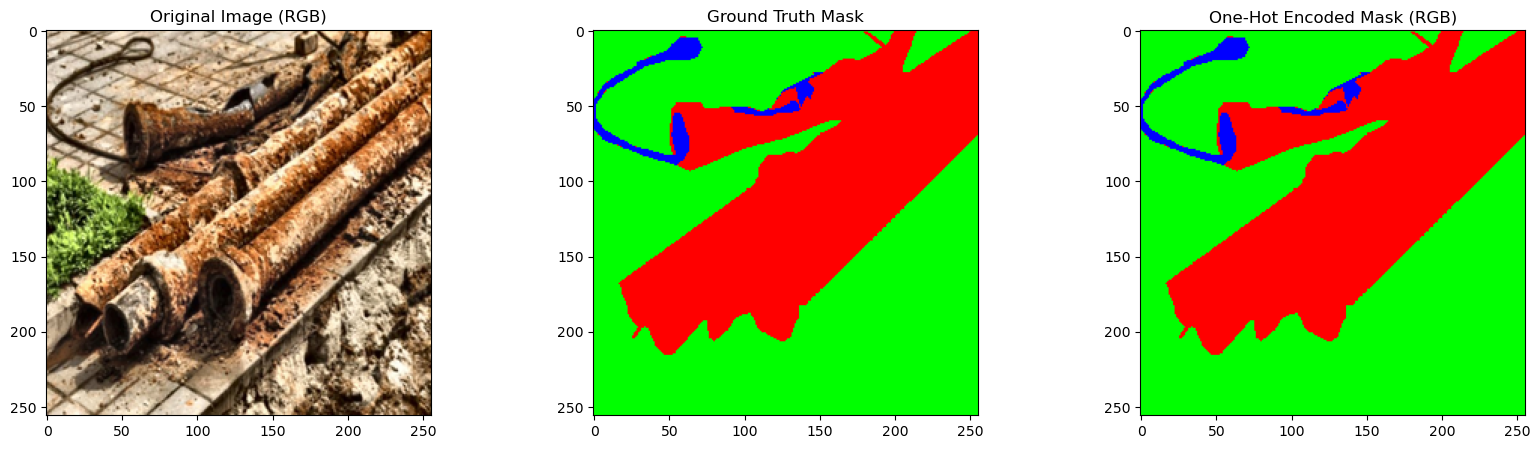

Unique classes in one_hot_visual: [0 1 2]


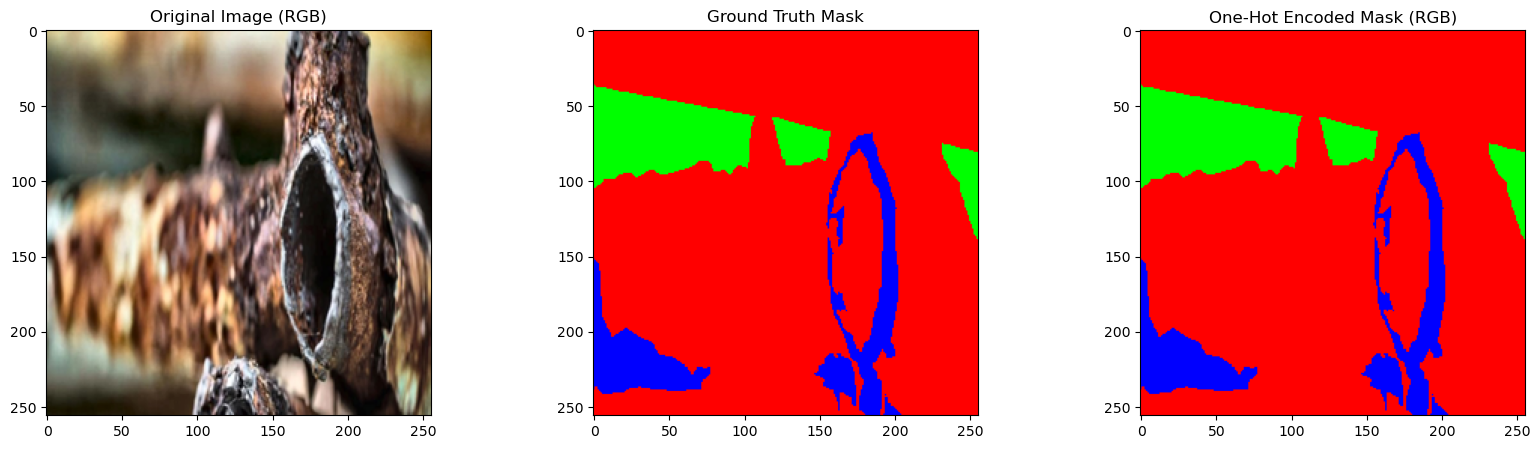

In [38]:
import os
import numpy as np
import cv2  # Import OpenCV
import shutil  # Import shutil for file operations
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Path to folder 'original' and 'ground_truth'
base_split = './DATASET' 
train_dir = os.path.join(base_dataset, 'train')
val_dir = os.path.join(base_dataset, 'val')

# Convert RGB to HEX color codes
def rgb_to_hex(rgb):
    """Convert RGB to HEX color code."""
    return "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])

# Encode the mask image into class indices
def encode_mask(mask_image, tolerance=3):
    """Encode the mask based on RGB values into class labels."""
    # Replace black background with green (assuming black is not a valid class)
    mask_image[np.all(mask_image == [0, 0, 0], axis=-1)] = [0, 255, 0]

    # Initialize encoded mask
    encoded_mask = np.zeros((mask_image.shape[0], mask_image.shape[1]), dtype=np.uint8)

    # Define class masks based on RGB color values with tolerance
    red_mask = np.all(np.abs(mask_image - [255, 0, 0]) <= tolerance, axis=-1)
    encoded_mask[red_mask] = 0

    green_mask = np.all(np.abs(mask_image - [0, 255, 0]) <= tolerance, axis=-1)
    encoded_mask[green_mask] = 2

    blue_mask = np.all(np.abs(mask_image - [0, 0, 255]) <= tolerance, axis=-1)
    encoded_mask[blue_mask] = 1

    return encoded_mask

# One-hot encode the encoded mask
def one_hot_encode(encoded_mask, num_classes=3):
    """Convert the encoded mask into a one-hot encoded mask."""
    one_hot_mask = np.eye(num_classes)[encoded_mask]
    return one_hot_mask

# Load images and masks, then apply encoding and resizing
def load_and_one_hot_encode(original_dir, mask_dir, target_size=None):
    """Load images and masks, resize them, and apply one-hot encoding."""
    images = []
    masks = []
    one_hot_masks = []

    image_files = sorted(os.listdir(original_dir))
    mask_files = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(image_files, mask_files):
        # Read images and convert to RGB
        img = cv2.cvtColor(cv2.imread(os.path.join(original_dir, img_file)), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(os.path.join(mask_dir, mask_file)), cv2.COLOR_BGR2RGB)

        # Resize if target_size is specified
        if target_size is not None:
            img = cv2.resize(img, target_size)
            mask = cv2.resize(mask, target_size)

        # Ensure the image and mask have the same dimensions
        if img.shape[:2] == mask.shape[:2]:
            images.append(img)
            masks.append(mask)

            # Encode the mask and apply one-hot encoding
            encoded_mask = encode_mask(mask)
            one_hot_mask = one_hot_encode(encoded_mask)
            one_hot_masks.append(one_hot_mask)
        else:
            print(f"Size mismatch for {img_file} ({img.shape}) and {mask_file} ({mask.shape}). Skipping...")

    images = np.array(images)
    masks = np.array(masks)
    one_hot_masks = np.array(one_hot_masks)

    return images, masks, one_hot_masks

# Convert one-hot encoded mask to an RGB image for visualization
def convert_to_rgb(one_hot_visual, colormap):
    """Convert one-hot encoded mask to an RGB image for visualization."""
    shape = one_hot_visual.shape
    rgb_image = np.zeros((shape[0], shape[1], 3), dtype=np.uint8)

    # Map each class index to its corresponding color
    for class_index, color in colormap.items():
        rgb_image[one_hot_visual == class_index] = color

    return rgb_image

# Visualize original image, ground truth mask, one-hot mask, and the RGB-encoded mask
def visualize_sample(image, mask, one_hot_mask, colormap):
    """Visualize the original image, mask, one-hot encoded mask, and RGB encoded mask."""
    plt.figure(figsize=(20, 5))

    one_hot_visual = np.argmax(one_hot_mask, axis=-1)

    # Debugging output to check the unique classes
    print("Unique classes in one_hot_visual:", np.unique(one_hot_visual))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image (RGB)')

    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.title('Ground Truth Mask')

    plt.subplot(1, 3, 3)
    rgb_encoded_mask = convert_to_rgb(one_hot_visual, colormap)
    plt.imshow(rgb_encoded_mask)
    plt.title('One-Hot Encoded Mask (RGB)')
    plt.show()

# Define directories for training, validation, and test data
train_original_dir = os.path.join(base_split, "train", "original")
train_mask_dir = os.path.join(base_split, "train", "ground_truth")
val_original_dir = os.path.join(base_split, "val", "original")
val_mask_dir = os.path.join(base_split, "val", "ground_truth")
test_original_dir = os.path.join(base_split, "test", "original")
test_mask_dir = os.path.join(base_split, "test", "ground_truth")
target_size = (256, 256)

# Load and one-hot encode training and validation sets
train_images, train_masks, train_one_hot_masks = load_and_one_hot_encode(train_original_dir, train_mask_dir, target_size)
val_images, val_masks, val_one_hot_masks = load_and_one_hot_encode(val_original_dir, val_mask_dir, target_size)

# Assign data to training and validation sets
X_train = train_images
y_train = train_one_hot_masks

X_val = val_images
y_val = val_one_hot_masks

# Test set (loading only the paths, loading the images should be done similarly as train/val if needed)
X_test = test_original_dir
y_test = test_mask_dir

# Print shapes of the datasets for verification
print("Train Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nValidation Shapes:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

# Define colormap for each class index
colormap = {
    0: [255, 0, 0],    # Red
    2: [0, 255, 0],    # Green
    1: [0, 0, 255],    # Blue
}

# Print class information and hex color codes
print("\nClass Information and Hex Color Codes:")
for class_index, color in colormap.items():
    hex_color = rgb_to_hex(color)
    print(f'Class {class_index}: {hex_color}')

# Visualize a sample from the training set
index = 2  # Change this to visualize other samples
visualize_sample(X_train[index], train_masks[index], y_train[index], colormap)

# Visualize a sample from the validation set
index_val = 2  # Change this to visualize other samples
visualize_sample(X_val[index_val], val_masks[index_val], y_val[index_val], colormap)

# MODELING

## U-NET

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam

# Define U-Net model functions
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    x = layers.Dropout(0.1)(x)  # Dropout untuk regularisasi
    x = Conv2D(num_filters, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same")(x)
    return x

def encoder_block(inputs, num_filters):
    conv = conv_block(inputs, num_filters)
    pool = MaxPooling2D((2, 2))(conv)
    return conv, pool

def decoder_block(inputs, skip_features, num_filters):
    up = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding="same")(inputs)
    concat = concatenate([up, skip_features])
    conv = conv_block(concat, num_filters)
    return conv

# Build U-Net Model
def build_model(input_shape, num_classes):
    inputs = Input(input_shape)
    s = layers.Lambda(lambda x: x / 255.0)(inputs)

    # Encoder path
    s1, p1 = encoder_block(s, 32)
    s2, p2 = encoder_block(p1, 64)
    s3, p3 = encoder_block(p2, 128)
    s4, p4 = encoder_block(p3, 256)

    # Bottleneck
    b1 = conv_block(p4, 512)

    # Decoder path
    d1 = decoder_block(b1, s4, 256)
    d2 = decoder_block(d1, s3, 128)
    d3 = decoder_block(d2, s2, 64)
    d4 = decoder_block(d3, s1, 32)

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(d4)

    model = models.Model(inputs=[inputs], outputs=[outputs], name="U-Net")
    return model

input_shape = (256, 256, 3)
num_classes = 3  
model = build_model(input_shape, num_classes)

# Compile model
model.compile(optimizer=Adam(),  # Gunakan default learning rate
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

model.summary()


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lambda (Lambda)               │ (None, 256, 256, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 32)      │             896 │ lambda[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 32)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 32)      │           9,248 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 32)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 64)      │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 64)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 64)      │          36,928 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 64)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 128)       │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 128)       │         147,584 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 128)       │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 256)       │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 256)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 7,760,163 (29.60 MB)

 Trainable params: 7,760,163 (29.60 MB)

 Non-trainable params: 0 (0.00 B)

## DeepLab V3+

In [39]:
# Arsitektur Model DeepLabV3+
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
os. environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, UpSampling2D, AveragePooling2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

def ASSP(inputs):
    # shape = inputs.shape
    shape = inputs.shape

# Image Pooling
    y_pool = AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    print("y_pool 1 ", y_pool.shape)
    y_pool = Conv2D(filters=256, kernel_size=1, padding='same', use_bias=False)(y_pool)
    y_pool = BatchNormalization()(y_pool)
    y_pool = Activation("relu")(y_pool)
    y_pool = UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y_pool)
    # y_pool = UpSampling2D((shape[1] // y_pool.shape[1], shape[2] // y_pool.shape[2]), interpolation="bilinear")(y_pool)

    print("y_pool 2 ", y_pool.shape)
# 1x1 Conv Rate 1
    y_1 = Conv2D(filters=256, kernel_size=1, padding='same', use_bias=False)(inputs)
    y_1 = BatchNormalization()(y_1)
    y_1 = Activation("relu")(y_1)
# 3x3 Conv Rate 6
    y_6 = Conv2D(filters=256, kernel_size=3, dilation_rate=6, padding='same', use_bias=False)(inputs)
    y_6 = BatchNormalization()(y_6)
    y_6 = Activation("relu")(y_6)
# 3x3 Conv Rate 12
    y_12 = Conv2D(filters=256, kernel_size=3, dilation_rate=12, padding='same', use_bias=False)(inputs)
    y_12 = BatchNormalization()(y_12)
    y_12 = Activation("relu")(y_12)
# 3x3 Conv Rate 18
    y_18 = Conv2D(filters=256, kernel_size=3, dilation_rate=18, padding='same', use_bias=False)(inputs)
    y_18 = BatchNormalization()(y_18)
    y_18 = Activation("relu")(y_18)

# Concatenate
    y = Concatenate()([y_pool, y_1, y_6, y_12, y_18])

    print("Concatenate y", y.shape)
# 1x1  Conv
    y = Conv2D(filters=256, kernel_size=1, dilation_rate=1, padding='same', use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)


    print("return y", y.shape)
    return y

def DeepLabV3Plus(shape):
    """ inputs """
    inputs = Input(shape)

    """ Pre-Trained ResNet50 """
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=inputs)

    """ Pre-Trained ResNet50 Output """
    image_features = base_model.get_layer('conv4_block6_out').output
    print("image_features 1", image_features.shape)

#Upsampling by4
    x_a = ASSP(image_features)
    x_a = UpSampling2D((4, 4), interpolation="bilinear")(x_a)
    print("x_a", x_a.shape)

# 1x1 Conv
    """ Get Low-level features """
    x_b = base_model.get_layer('conv2_block2_out').output
    x_b = Conv2D(filters=48, kernel_size=1, padding='same', use_bias=False)(x_b)
    x_b = BatchNormalization()(x_b)
    x_b = Activation("relu")(x_b)

    print("x_b", x_b.shape)
# Concatenate
    x = Concatenate()([x_a, x_b])

    print("Concatenate x", x.shape)

# 3x3 Conv
    x = Conv2D(filters=256, kernel_size=3, padding='same', activation="relu", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', activation="relu", use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    print("3x3 Conv",x.shape)

#Upsampling by4
    x = UpSampling2D((4, 4), interpolation="bilinear")(x)
    print("UpSampling4x4",x.shape)

    """ Outputs """
    x = Conv2D(3, (1, 1), name='output_layer')(x)

# modify to multiclass
    x = Activation('softmax')(x)

    print(x.shape)

    """ Model """
    model = Model(inputs=inputs, outputs=x)  # Changed 'input' to 'inputs'
    return model


if __name__ == "__main__":
    input_shape = (256, 256, 3)
    model = DeepLabV3Plus(input_shape)

model.summary()

image_features 1 (None, 16, 16, 1024)
y_pool 1  (None, 1, 1, 1024)
y_pool 2  (None, 16, 16, 256)
Concatenate y (None, 16, 16, 1280)
return y (None, 16, 16, 256)
x_a (None, 64, 64, 256)
x_b (None, 64, 64, 48)
Concatenate x (None, 64, 64, 304)
3x3 Conv (None, 64, 64, 256)
UpSampling4x4 (None, 256, 256, 256)
(None, 256, 256, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 17,830,723 (68.02 MB)

 Trainable params: 17,795,939 (67.89 MB)

 Non-trainable params: 34,784 (135.88 KB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
from openpyxl import Workbook
from openpyxl.drawing.image import Image
import pathlib
from datetime import datetime

# Directory Setup
log_dir = os.path.join('./DATASET', 'model')
os.makedirs(log_dir, exist_ok=True)

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    mode='min',
    min_lr=1e-6,
    verbose=1
)

tensorboard = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

callbacks = [early_stopping, model_checkpoint, reduce_lr, tensorboard]

# Measure Computation Time
start_time = time.time()

# Compile Model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=8, 
    validation_data=(X_val, y_val),
    callbacks=callbacks  # Include the combined callbacks
)

end_time = time.time()
training_time = end_time - start_time

# Model Size Calculation
model_size = model.count_params() * 4  # Assuming float32, 4 bytes

# Print Training Time and Model Size
print(f'Training computation time: {training_time:.2f} seconds')
print(f'Model size: {model_size / (1024 ** 2):.2f} MB')

# Convert History to DataFrame
df = pd.DataFrame(history.history)

# Save Training History to Excel
excel_path = os.path.join('./DATASET', 'model', 'Training_History.xlsx')
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    # Save the DataFrame to Excel
    df.to_excel(writer, index=False, sheet_name='Training History')

    # Create a new sheet for plots
    workbook = writer.book
    worksheet = workbook.create_sheet(title='Plots')

    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    loss_plot_path = os.path.join(log_dir, "loss_plot.png")
    plt.savefig(loss_plot_path)
    plt.close()

    # Add Loss Plot to Excel
    img = Image(loss_plot_path)
    worksheet.add_image(img, 'A1')

    # Plot Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    accuracy_plot_path = os.path.join(log_dir, "accuracy_plot.png")
    plt.savefig(accuracy_plot_path)
    plt.close()

    # Add Accuracy Plot to Excel
    img = Image(accuracy_plot_path)
    worksheet.add_image(img, 'A40')

# Display Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()
print("TensorBoard data and plots saved to model directory.")S

# Save Model in Various Formats
model_directory = os.path.join('./DATASET', 'model')
os.makedirs(model_directory, exist_ok=True)

# Save in . keras Format
model_path = os.path.join(model_directory, 'Model_UNet/DeepLabV3+.keras') #Change the filename
model.save(model_path)
print(f"Model successfully saved in Keras format at {model_path}")

# Save in .h5 Format
h5_model_path = os.path.join(model_directory, 'Model_UNet/DeepLabV3+.h5') #Change the filename
model.save(h5_model_path)
print(f"Model successfully saved in H5 format at {h5_model_path}")

# Save Architecture in JSON
json_model_path = os.path.join(model_directory, 'Model_UNet/DeepLabV3+.json') #Change the filename
model_json = model.to_json()
with open(json_model_path, 'w') as json_file:
    json_file.write(model_json)
print(f"Model successfully saved in JSON format at {json_model_path}")

# Convert to TensorFlow Lite (.tflite)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_model_file = pathlib.Path(model_directory, 'Model_UNet/DeepLabV3+.tflite') #Change the filename
tflite_model_file.write_bytes(tflite_model)
print(f"Model successfully converted and saved at {tflite_model_file}")

# MODEL EVALUATION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import pandas as pd
import cv2
import time
from tensorflow.keras.models import load_model
import keras

# Enable unsafe deserialization
keras.config.enable_unsafe_deserialization() 

# Load the pre-trained U-Net model
model_path = os.path.join('./DATASET', 'model', 'Model_B8E20.h5')
model = load_model(model_path)

def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + 1e-7) / (np.sum(y_true) + np.sum(y_pred) + 1e-7)

def iou_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return (intersection + 1e-7) / (union + 1e-7)

def f1_score_custom(y_true, y_pred):
    return f1_score(y_true.flatten(), y_pred.flatten(), average='weighted')

def calculate_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true.flatten(), y_pred.flatten())
    return cm

def overlay_images(original, mask, opacity=0.5):
    overlay = cv2.addWeighted(original, 1 - opacity, mask, opacity, 0)
    return overlay

def convert_to_rgb(mask, colormap):
    rgb_image = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for cls, color in colormap.items():
        rgb_image[mask == cls] = color
    return rgb_image

def evaluate_model_on_test_data(predictions_class_index, y_test, colormap):
    y_test_class_index = np.argmax(y_test, axis=-1)
    num_classes = y_test.shape[-1]
    mean_dice = np.zeros(num_classes)
    mean_iou = np.zeros(num_classes)
    mean_f1 = np.zeros(num_classes)
    
    num_samples = y_test.shape[0]

    for i in range(num_samples):
        start_time = time.time()
        for cls in range(num_classes):
            y_true_class = (y_test_class_index[i] == cls).astype(np.uint8)
            y_pred_class = (predictions_class_index[i] == cls).astype(np.uint8)

            mean_dice[cls] += dice_coefficient(y_true_class, y_pred_class)
            mean_iou[cls] += iou_score(y_true_class, y_pred_class)
            mean_f1[cls] += f1_score_custom(y_true_class, y_pred_class)

    mean_dice /= num_samples
    mean_iou /= num_samples
    mean_f1 /= num_samples

    overall_mean_dice = np.mean(mean_dice)
    overall_mean_iou = np.mean(mean_iou)
    overall_mean_f1 = np.mean(mean_f1)

    cm = calculate_confusion_matrix(y_test_class_index, predictions_class_index)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    metrics_df = pd.DataFrame({
        'Class': ['Corrosion (Red)', 'Asset (Blue)', 'Background (Green)'],
        'IoU': mean_iou,
        'Dice': mean_dice,
        'F1-Score': mean_f1
    })

    print(metrics_df.to_string(index=False))
    print("==================================================")
    print(f"Overall Mean Dice: {overall_mean_dice:.4f}")
    print(f"Overall Mean IoU: {overall_mean_iou:.4f}")
    print(f"Overall Mean F1-Score: {overall_mean_f1:.4f}")
    print("==================================================")

    computation_times = []
    for i in range(num_samples):
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 4, 1)
        plt.imshow(X_test_images[i])
        plt.title('Original Image')

        plt.subplot(1, 4, 2)
        ground_truth_rgb = convert_to_rgb(y_test_class_index[i], colormap)
        plt.imshow(ground_truth_rgb)
        plt.title('Ground Truth Mask')

        plt.subplot(1, 4, 3)
        predicted_rgb = convert_to_rgb(predictions_class_index[i], colormap)
        plt.imshow(predicted_rgb)
        plt.title('Predicted Mask')

        overlay = overlay_images(X_test_images[i], predicted_rgb, opacity=0.4)
        plt.subplot(1, 4, 4)
        plt.imshow(overlay)
        plt.title('Overlay Prediction')
        
        plt.tight_layout()
        plt.show()

        end_time = time.time()
        computation_time = end_time - start_time
        computation_times.append(computation_time)
        print(f"Image {i+1}: Computation Time = {computation_time:.4f} seconds")

# Load test data
# Assuming load_and_one_hot_encode is a function that loads and preprocesses your test data
X_test_images, y_test_masks, y_test_one_hot_masks = load_and_one_hot_encode(test_original_dir, test_mask_dir, target_size)

# Convert test data to appropriate format for evaluation
y_test_class_index = np.argmax(y_test_one_hot_masks, axis=-1)

# Compute predictions
predictions = model.predict(X_test_images)
predictions_class_index = np.argmax(predictions, axis=-1)

# Evaluate model on test data
evaluate_model_on_test_data(predictions_class_index, y_test_one_hot_masks, colormap)

# Calculate confusion matrix
cm = calculate_confusion_matrix(y_test_class_index, predictions_class_index)

In [ ]:
# import os
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import load_model
# import re
# import time

# # Enable unsafe deserialization
# import keras
# keras.config.enable_unsafe_deserialization()

# # Fungsi konversi RGB ke kode warna HEX
# def rgb_to_hex(rgb):
#     """Convert RGB to HEX color code."""
#     return "#{:02x}{:02x}{:02x}".format(rgb[0], rgb[1], rgb[2])

# # Load images from a directory
# def load_images(original_dir, target_size=None):
#     """Load images and resize them, returning images and filenames."""
#     images = []
#     filenames = []
#     # Sort filenames numerically
#     image_files = sorted(os.listdir(original_dir), key=lambda x: int(re.search(r'(\d+)', x).group()))

#     for img_file in image_files:
#         img = cv2.cvtColor(cv2.imread(os.path.join(original_dir, img_file)), cv2.COLOR_BGR2RGB)
#         if target_size:
#             img = cv2.resize(img, target_size)
#         images.append(img)
#         filenames.append(img_file)

#     return np.array(images), filenames

# # Konversi satu-hot encoded mask menjadi gambar RGB untuk visualisasi
# def convert_to_rgb(mask, colormap):
#     """Convert class-index mask to RGB image for visualization."""
#     h, w = mask.shape
#     rgb_mask = np.zeros((h, w, 3), dtype=np.uint8)
#     for cls, color in colormap.items():
#         rgb_mask[mask == cls] = color
#     return rgb_mask

# # Overlay gambar asli dan mask
# def overlay_images(original, mask, opacity=0.5):
#     return cv2.addWeighted(original, 1 - opacity, mask, opacity, 0)

# # Fungsi evaluasi model
# def evaluate_model_on_test_data(model, X_test, colormap, filenames):
#     predictions = model.predict(X_test)
#     predictions_class_index = np.argmax(predictions, axis=-1)
    
#     computation_times = []

#     # Tampilkan beberapa sampel hasil prediksi
#     for i in range(X_test.shape[0]):
#         start_time = time.time()
#         plt.figure(figsize=(18, 6))
        
#         # Gambar asli
#         plt.subplot(1, 4, 1)
#         plt.imshow(X_test[i])
#         plt.title(f'Original Image\nFilename: {filenames[i]}')  # Display filename

#         # Prediksi mask
#         plt.subplot(1, 4, 2)
#         plt.imshow(convert_to_rgb(predictions_class_index[i], colormap))
#         plt.title('Predicted Mask')
        
#         # Overlay
#         overlay = overlay_images(X_test[i], convert_to_rgb(predictions_class_index[i], colormap))
#         plt.subplot(1, 4, 3)
#         plt.imshow(overlay)
#         plt.title('Overlay Prediction')
        
#         plt.tight_layout()
#         plt.show()
        
#         # Waktu komputasi
#         computation_times.append(time.time() - start_time)

#     # Rata-rata waktu komputasi
#     print(f"Average Computation Time per Image: {np.mean(computation_times):.4f} seconds")

# # Load the pre-trained U-Net model
# model_path = " /U-NET MODEL/Model_UNet.h5"
# unet_model = load_model(model_path)

# # Data
# test_original_dir = r"C:/Users/dewam/Dokumen/Semester 7/Magang/Project/DatasetAIDAPhase3/original"
# target_size = (256, 256)

# # Define a colormap for visualization
# colormap = {
#     0: [255, 0, 0],    # Class 0 (Red)
#     1: [0, 0, 255],    # Class 1 (Green)
#     2: [0, 255, 0],    # Class 2 (Blue)
# }

# # Load data
# X_test_images, filenames = load_images(test_original_dir, target_size)

# # Evaluasi model tanpa y_test
# evaluate_model_on_test_data(unet_model, X_test_images, colormap, filenames)